In [3]:
# load the dataset from the folder in here
### check

import os
notebook_train_path = os.path.abspath("fashion_mnist/fashion-mnist_train.csv")
notebook_test_path = os.path.abspath("fashion_mnist/fashion-mnist_test.csv")

# shuffle the dataset and all that
### check

# create a simple cnn
### check

#####
# good guide: https://www.kaggle.com/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist


In [4]:
import pandas

train_dataset = pandas.read_csv(notebook_train_path)
test_dataset = pandas.read_csv(notebook_test_path)

# shuffle the data
#train_dataset = train_dataset.sample(frac=1) # frac = 1 means it returns all rows
#test_dataset = test_dataset.sample(frac=1)

In [4]:
# need to change the shape of the data to 28x28x1

In [10]:
# create a simple cnn

import tensorflow as tf
#from tensorflow.keras.optimizers import RMSprop
import keras

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2), 
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2), # this condenses the image to a single pixel.
    # adding more layers either wouldn't do anything or would result in an error
  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(), 
  # the amount of neurons can be anything? originally 512, where is that number from?
    # cause it's 2^9
    # try 100
    # works! same accuracy after 10 epochs
  tf.keras.layers.Dense(100, activation='relu'),
  # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
  tf.keras.layers.Dense(10, activation='softmax') # here, 10 is the number of classes. the
    # last layer specifies the number of classes.
])

# because the image is condensed so quickly, you can increase the amount of filters
# rather than the number of layers for improved accuracy


In [11]:
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# data exploration

print(train_dataset.head())

# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

In [13]:
# need to normalize the values
# need to convert to tensors
# define the label column as target

# convert the train_dataset to X_train and y_train

# data preprocessing
def data_preprocessing(raw):
    out_y = tf.keras.utils.to_categorical(raw.label) 
    # the label column is now categorical
    # i.e. the target column
    # 10 is the amount of categories. let's say the # will be inferred
    x_as_array = raw.values[:,1:] # everything but the label col
    x_shaped_array = x_as_array.reshape(raw.shape[0], 28, 28, 1) # reshaping to tensors
    out_x = x_shaped_array / 255 # normalize the values
    return out_x, out_y

X_train, y_train = data_preprocessing(train_dataset)
X_test, y_test = data_preprocessing(test_dataset)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (60000, 28, 28, 1)
y_train shape:  (60000, 10)
X_test shape:  (10000, 28, 28, 1)
y_test shape:  (10000, 10)


In [14]:
#import sklearn
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, test_size = 0.3)

#print(X_train[0,0])

##### write a function that splits the dataset into train_test. or use another function
# or investigate wtf is happening here

# tried updating scipy. apparently, i might have 2 scipy versions installed and
# that's why i'm getting this dumbass error. so i'd need to uninstall both scipy's
# and install one version again. or smth. that might work


# orrrrrr. i can shuffle rows with a random seed. 
# and grab the first 70% of the data and let that be the training dataset

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [28]:
print(X_train.shape)
print(X_val.shape)

(42000, 28, 28, 1)
(18000, 28, 28, 1)


In [16]:
# create the x_val and y_val first!!!!!

N_EPOCHS = 10
BATCH_SIZE = 128
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=N_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/10
329/329 [==============================] - 10s 29ms/step - loss: 0.8447 - accuracy: 0.6918 - val_loss: 0.6044 - val_accuracy: 0.7803
Epoch 2/10
329/329 [==============================] - 9s 28ms/step - loss: 0.5622 - accuracy: 0.7917 - val_loss: 0.5408 - val_accuracy: 0.8074
Epoch 3/10
329/329 [==============================] - 10s 29ms/step - loss: 0.4996 - accuracy: 0.8181 - val_loss: 0.4936 - val_accuracy: 0.8131
Epoch 4/10
329/329 [==============================] - 10s 30ms/step - loss: 0.4566 - accuracy: 0.8357 - val_loss: 0.4601 - val_accuracy: 0.8356
Epoch 5/10
329/329 [==============================] - 9s 27ms/step - loss: 0.4250 - accuracy: 0.8453 - val_loss: 0.4326 - val_accuracy: 0.8452
Epoch 6/10
329/329 [==============================] - 8s 25ms/step - loss: 0.4011 - accuracy: 0.8534 - val_loss: 0.4307 - val_accuracy: 0.8444
Epoch 7/10
329/329 [==============================] - 9s 28ms/step - loss: 0.3802 - accuracy: 0.8614 - val_loss: 0.4154 - val_accuracy: 0.8

In [48]:
# here's a slightly diff cnn with more filters and a smaller dense layer
# and what's with the powers of 2 for the amount of filters. let's try some normal numbers
# maybe you do that because of the way the information is computed? like it's all
# binary, so this makes the computation faster somehow?

# nah, it's just a convention

model_two = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(60, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2), 
  tf.keras.layers.Conv2D(120, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(90, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [49]:
model_two.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [50]:
model_two.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 60)        16260     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 60)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 120)         64920     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 1, 1, 120)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 120)              

In [51]:
train_model_two = model_two.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=N_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 17s 402us/sample - loss: 0.7604 - accuracy: 0.7247 - val_loss: 0.5405 - val_accuracy: 0.8022
Epoch 2/10
42000/42000 [==============================] - 18s 423us/sample - loss: 0.4908 - accuracy: 0.8222 - val_loss: 0.4468 - val_accuracy: 0.8379
Epoch 3/10
42000/42000 [==============================] - 18s 423us/sample - loss: 0.4321 - accuracy: 0.8436 - val_loss: 0.4165 - val_accuracy: 0.8504
Epoch 4/10
42000/42000 [==============================] - 17s 402us/sample - loss: 0.3887 - accuracy: 0.8601 - val_loss: 0.3861 - val_accuracy: 0.8603
Epoch 5/10
42000/42000 [==============================] - 17s 399us/sample - loss: 0.3628 - accuracy: 0.8662 - val_loss: 0.3744 - val_accuracy: 0.8647
Epoch 6/10
42000/42000 [==============================] - 18s 440us/sample - loss: 0.3411 - accuracy: 0.8770 - val_loss: 0.3602 - val_accuracy: 0.8718
Epoch 7/10
42000/42000 [====================

In [60]:
score = model_two.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.30791886209249497
Test accuracy: 0.8895


In [67]:
x = model_two.history.history
# https://stackoverflow.com/questions/51731207/python-neural-network-typeerror-history-object-is-not-subscriptable
print(x.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


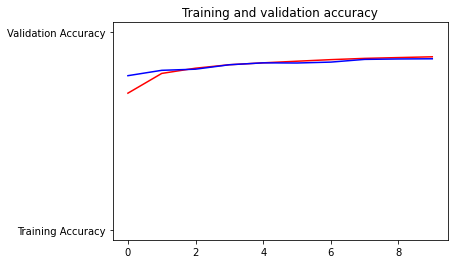

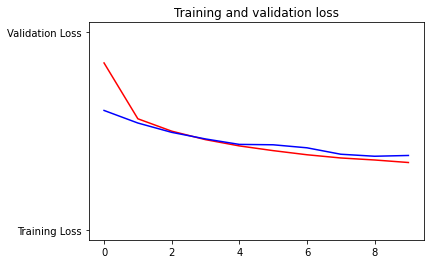

In [23]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
def plot_accuracy_and_loss(train_model):
    hist = train_model.history.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']

    epochs = range(len(acc)) # Get number of epochs

    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    plt.plot(epochs, acc, 'r', "Training Accuracy")
    plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
    plt.title('Training and validation accuracy')
    plt.figure()

    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.plot(epochs, loss, 'r', "Training Loss")
    plt.plot(epochs, val_loss, 'b', "Validation Loss")


    plt.title('Training and validation loss')
    
plot_accuracy_and_loss(model)

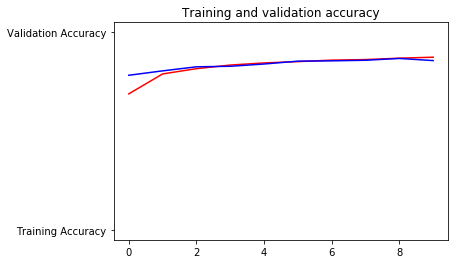

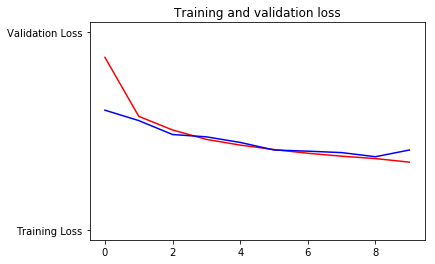

In [69]:
plot_accuracy_and_loss(model)

In [ ]:
# looks like underfitting. and i also know that it could be learning faster

In [18]:
model_three = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(60, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2), 
  tf.keras.layers.Conv2D(120, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_three.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

train_model_three = model_three.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=N_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/10
329/329 [==============================] - 20s 60ms/step - loss: 0.7853 - accuracy: 0.7175 - val_loss: 0.5652 - val_accuracy: 0.7888
Epoch 2/10
329/329 [==============================] - 19s 57ms/step - loss: 0.5121 - accuracy: 0.8147 - val_loss: 0.4578 - val_accuracy: 0.8378
Epoch 3/10
329/329 [==============================] - 19s 58ms/step - loss: 0.4375 - accuracy: 0.8421 - val_loss: 0.4428 - val_accuracy: 0.8391
Epoch 4/10
329/329 [==============================] - 18s 56ms/step - loss: 0.3982 - accuracy: 0.8556 - val_loss: 0.4018 - val_accuracy: 0.8524
Epoch 5/10
329/329 [==============================] - 17s 51ms/step - loss: 0.3707 - accuracy: 0.8646 - val_loss: 0.3914 - val_accuracy: 0.8527
Epoch 6/10
329/329 [==============================] - 16s 49ms/step - loss: 0.3455 - accuracy: 0.8753 - val_loss: 0.3629 - val_accuracy: 0.8673
Epoch 7/10
329/329 [==============================] - 15s 45ms/step - loss: 0.3245 - accuracy: 0.8818 - val_loss: 0.3716 - val_accuracy:

In [29]:
score_three = model_three.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_accuracy_and_loss(model_three)

Test loss: 0.31792327761650085
Test accuracy: 0.8863000273704529


KeyError: 'accuracy'

In [ ]:
# k, good enough.

In [43]:
from tensorflow.keras.models import load_model
model.save("model.h5")
print("Saved model to disk")
 
# load model
model_four = load_model('model.h5')

Saved model to disk


In [44]:
score = model_four.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3673039972782135
Test accuracy: 0.8676999807357788


In [54]:
from keras.preprocessing import image
import keras
import numpy as np

img_height, img_width = 28, 28
class_names = list(labels.values())

#sunflower_path = os.path.abspath("fruits-360/Test/Cauliflower/9_100.jpg")
sunflower_path = os.path.abspath("fashion_mnist/vans_tshirt.jpeg")

#sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
#sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width), color_mode = "grayscale"
)
img.show()
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_four.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Bag with a 23.20 percent confidence.


In [ ]:
#https://machinelearningmastery.com/save-load-keras-deep-learning-models/